In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [39]:
from pandas import read_csv, unique

import numpy as np
import pandas as pd

from scipy.interpolate import interp1d
from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [40]:
names = ["NaN", "user_id", "activity", "timestamp", "x_axis", "y_axis", "z_axis"]
data = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/paperwork/WISDM.csv", header=None, names=names, skiprows=1)

def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

df = data.drop('NaN', axis=1)
df["z_axis"].replace(regex = True, inplace = True, to_replace = r';', value = r'')
    # ... and then this column must be transformed to float explicitly
df.dropna(axis=0, how='any', inplace=True)
df.head()
print(df.shape)

(1098203, 6)


In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098203 entries, 0 to 1098202
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user_id    1098203 non-null  int64  
 1   activity   1098203 non-null  object 
 2   timestamp  1098203 non-null  int64  
 3   x_axis     1098203 non-null  float64
 4   y_axis     1098203 non-null  float64
 5   z_axis     1098203 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ MB


In [42]:
df.head()


,user_id,activity,timestamp,x_axis,y_axis,z_axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098203 entries, 0 to 1098202
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user_id    1098203 non-null  int64  
 1   activity   1098203 non-null  object 
 2   timestamp  1098203 non-null  int64  
 3   x_axis     1098203 non-null  float64
 4   y_axis     1098203 non-null  float64
 5   z_axis     1098203 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ MB


In [44]:
mapping = {'Walking': 0, 'Jogging': 1, 'Upstairs': 2, 'Downstairs': 3, 'Sitting': 4, 'Standing': 5}

# 레이블 인코딩
df['ActivityEncoded'] = df['activity'].map(mapping)
df

,user_id,activity,timestamp,x_axis,y_axis,z_axis,ActivityEncoded
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,1
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,1
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,1
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,1
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,1
...,...,...,...,...,...,...,...
1098198,19,Sitting,131623331483000,9.000000,-1.570000,1.690000,4
1098199,19,Sitting,131623371431000,9.040000,-1.460000,1.730000,4
1098200,19,Sitting,131623411592000,9.080000,-1.380000,1.690000,4
1098201,19,Sitting,131623491487000,9.000000,-1.460000,1.730000,4


<Axes: xlabel='activity', ylabel='count'>

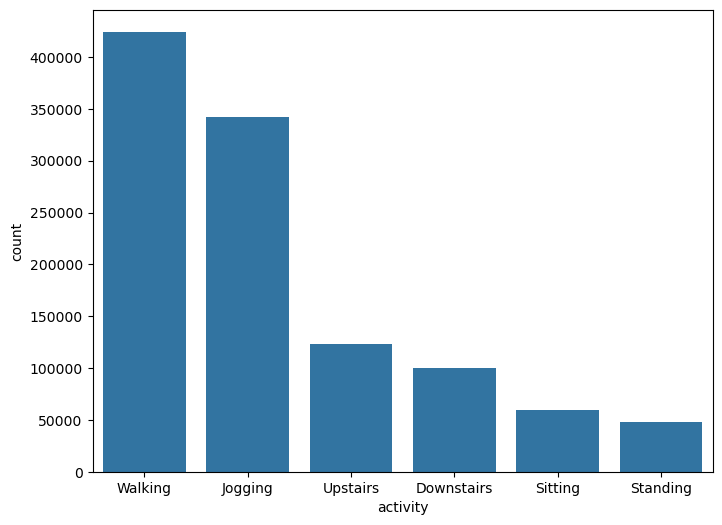

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(x = "activity", data = df, order = df.activity.value_counts().index)
     

/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_23619/1793805087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "user_id", data = df, palette = [sns.color_palette()[0]],
/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_23619/1793805087.py:2: UserWarning: 
The palette list has fewer values (1) than needed (36) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x = "user_id", data = df, palette = [sns.color_palette()[0]],


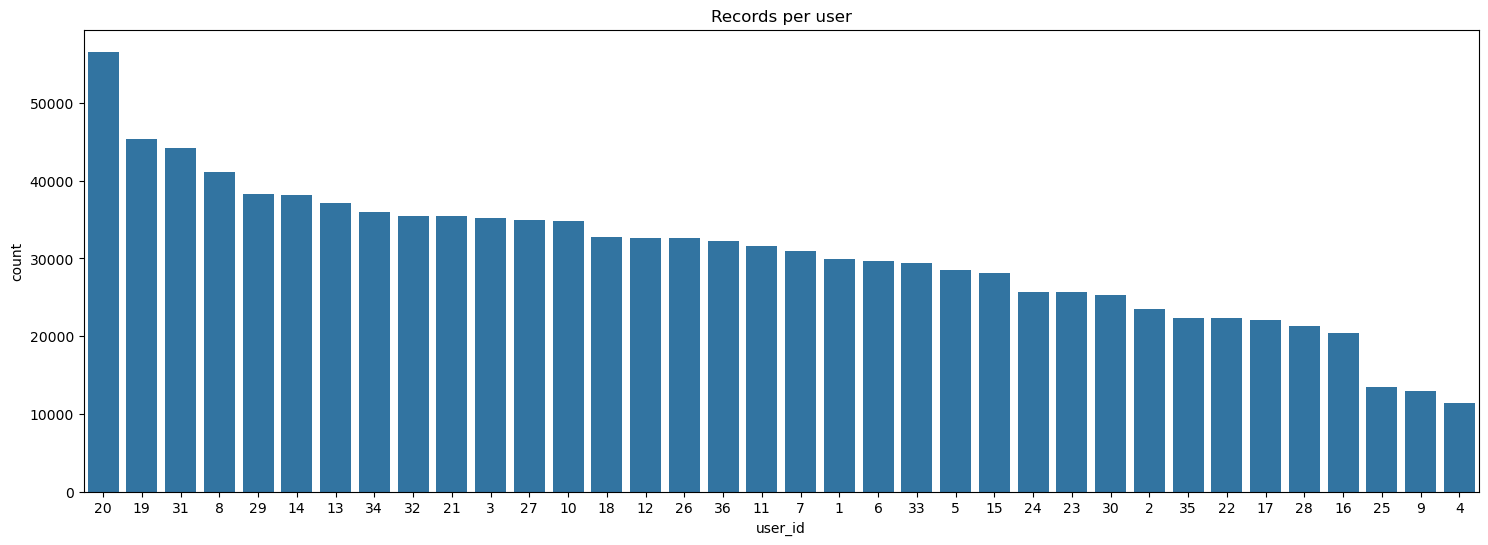

In [46]:
plt.figure(figsize=(18, 6))
sns.countplot(x = "user_id", data = df, palette = [sns.color_palette()[0]],
              order = df.user_id.value_counts().index)
plt.title("Records per user");

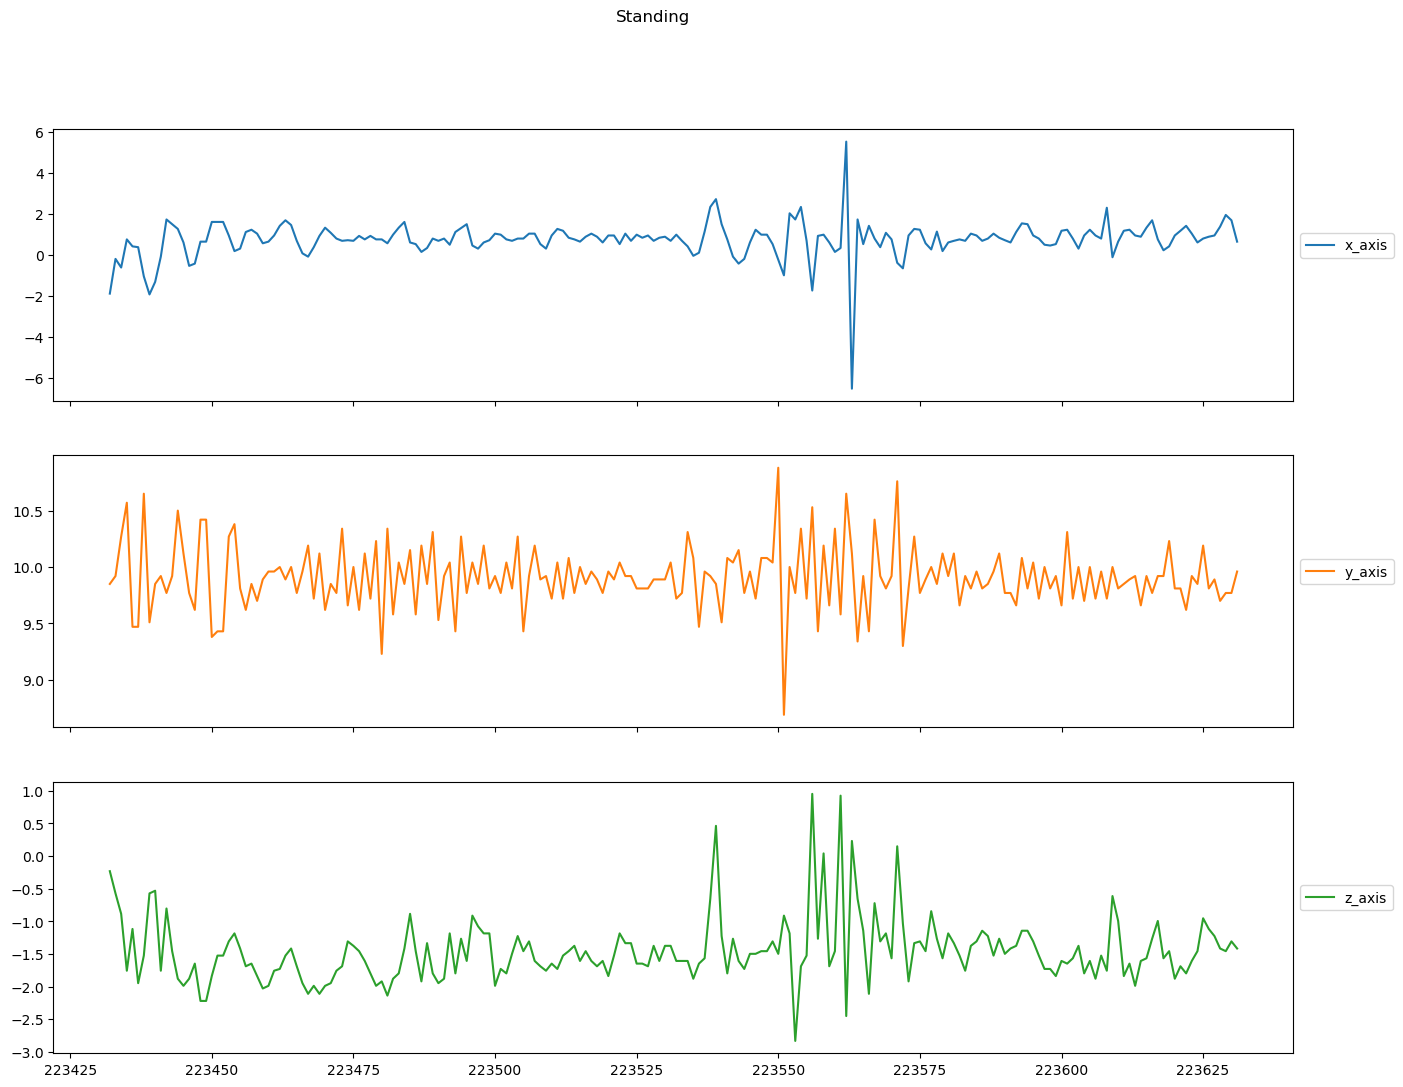

In [47]:
def plot_activity(activity, df):
    data = df[df["activity"] == activity][["x_axis", "y_axis", "z_axis"]][:200]
    axis = data.plot(subplots = True, figsize = (16, 12), title = activity)
    for ax in axis:
        ax.legend(loc = "lower left", bbox_to_anchor = (1.0, 0.5))

plot_activity("Standing", df)

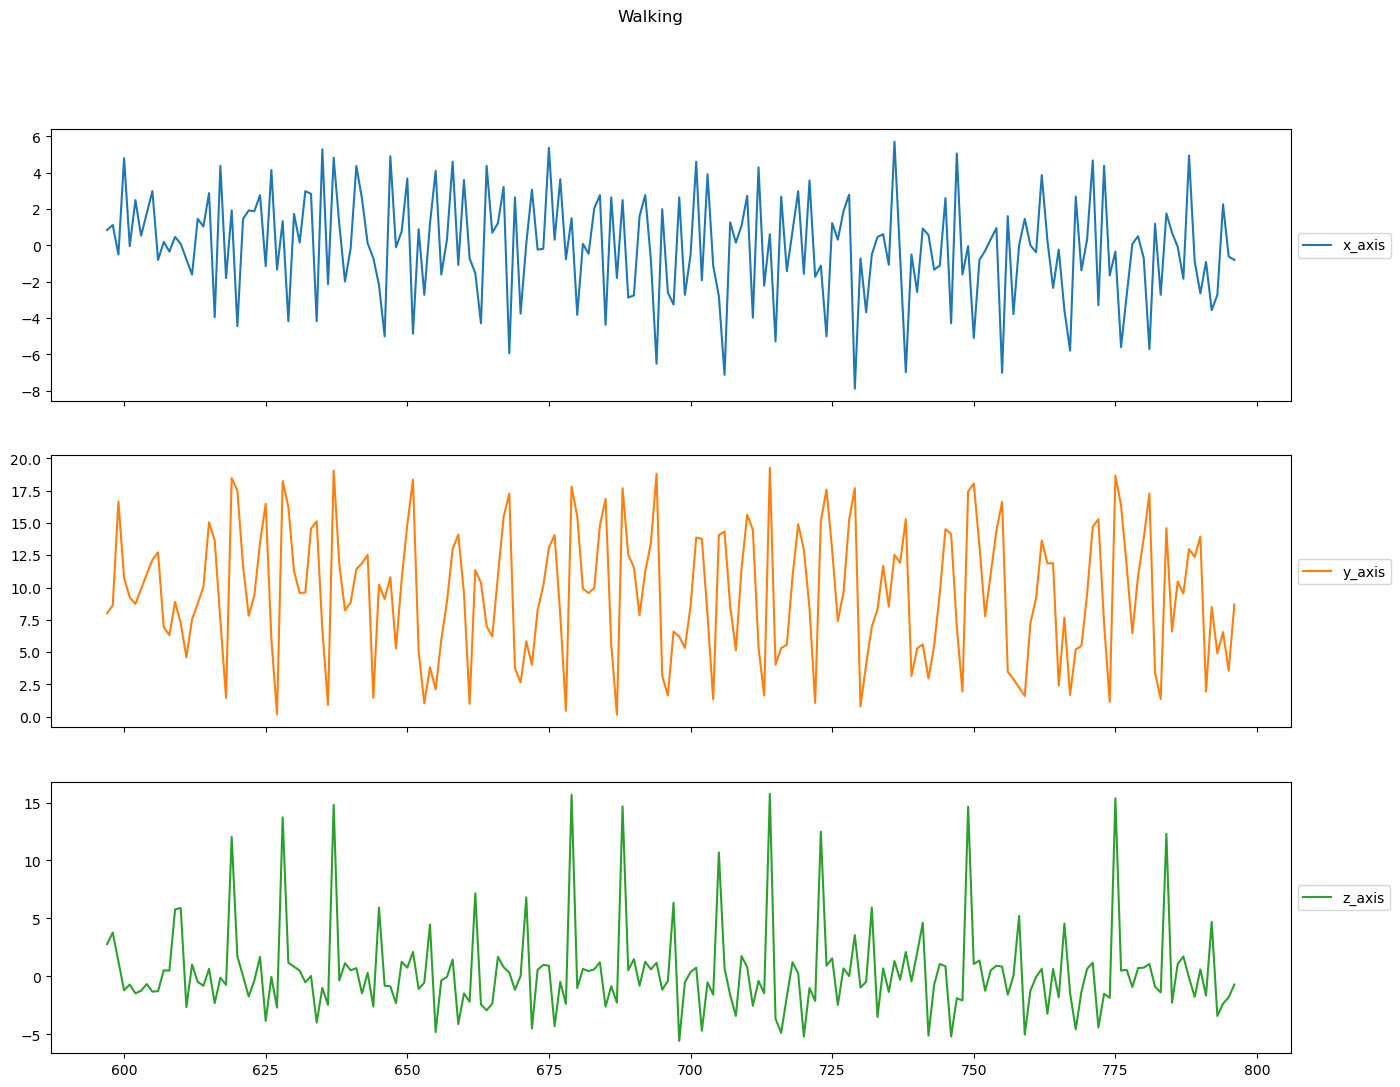

In [48]:
plot_activity("Walking", df)

In [49]:
df.loc[:, 'ActivityEncoded'] = df['ActivityEncoded'].astype('int64')

In [50]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 200
STEP = 40

X_data, y_data = create_dataset(df[["x_axis", "y_axis", "z_axis"]], df.ActivityEncoded, TIME_STEPS,
                                  STEP)

X_train, X_test,y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, stratify=  y_data )
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2, stratify=  y_train )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17568, 200, 3) (17568, 1)
(5491, 200, 3) (5491, 1)


In [51]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체 생성
enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# 학습 데이터에 OneHotEncoder 적용
enc.fit(y_train)

# 학습, 테스트 및 검증 데이터 변환
y_train_hot = enc.transform(y_train)
y_test_hot = enc.transform(y_test)
y_val_hot = enc.transform(y_val)

# 데이터의 모양 출력
print(X_train.shape, y_train_hot.shape, X_test.shape, y_test_hot.shape)

(17568, 200, 3) (17568, 6) (5491, 200, 3) (5491, 6)


In [52]:
#Epoch 500

BATCH_SIZE = 16

verbose,epochs,batch_size=1,10, BATCH_SIZE

n_timesteps,n_features,n_outputs= X_train.shape[1],X_train.shape[2],y_train_hot.shape[1]
n_timesteps,n_features,n_outputs

(200, 3, 6)

In [55]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(80))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 198, 64)           640       
                                                                 
 conv1d_4 (Conv1D)           (None, 196, 64)           12352     
                                                                 
 dropout_2 (Dropout)         (None, 196, 64)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 98, 64)           0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 80)                46400     
                                                                 
 dropout_3 (Dropout)         (None, 80)                0         
                                                      

In [57]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20
275/275 [==============================] - 17s 49ms/step - loss: 0.1453 - accuracy: 0.9520 - val_loss: 0.1342 - val_accuracy: 0.9572
Epoch 2/20
275/275 [==============================] - 13s 48ms/step - loss: 0.1296 - accuracy: 0.9574 - val_loss: 0.1246 - val_accuracy: 0.9590
Epoch 3/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1089 - accuracy: 0.9644 - val_loss: 0.1815 - val_accuracy: 0.9306
Epoch 4/20
275/275 [==============================] - 13s 48ms/step - loss: 0.0972 - accuracy: 0.9678 - val_loss: 0.1059 - val_accuracy: 0.9677
Epoch 5/20
275/275 [==============================] - 13s 48ms/step - loss: 0.0881 - accuracy: 0.9701 - val_loss: 0.1014 - val_accuracy: 0.9663
Epoch 6/20
275/275 [==============================] - 13s 48ms/step - loss: 0.0842 - accuracy: 0.9719 - val_loss: 0.0730 - val_accuracy: 0.9768
Epoch 7/20
275/275 [==============================] - 13s 47ms/step - loss: 0.0736 - accuracy: 0.9765 - val_loss: 0.0676 - val_accuracy:

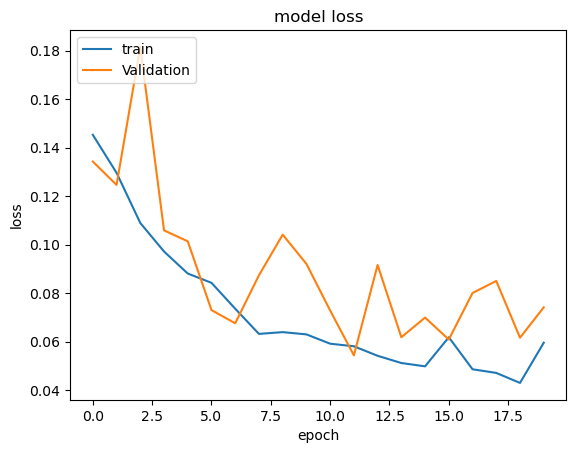

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

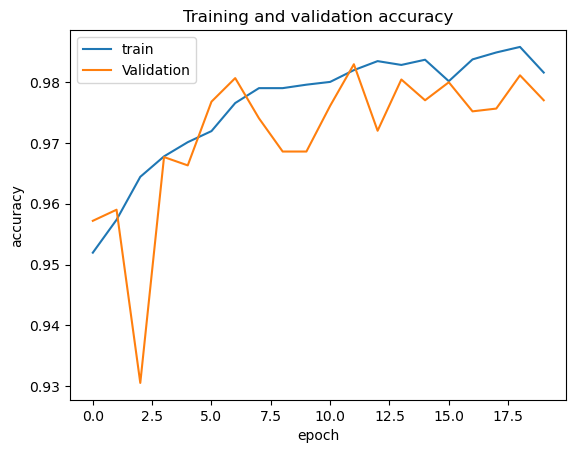

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

172/172 [==============================] - 3s 17ms/step
f1_score =  0.9755256341902909
0.9754143143325441
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2123
           1       1.00      0.98      0.99      1710
           2       0.94      0.93      0.94       614
           3       0.92      0.96      0.94       502
           4       0.99      0.88      0.93       300
           5       0.87      0.98      0.92       242

    accuracy                           0.98      5491
   macro avg       0.95      0.96      0.95      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

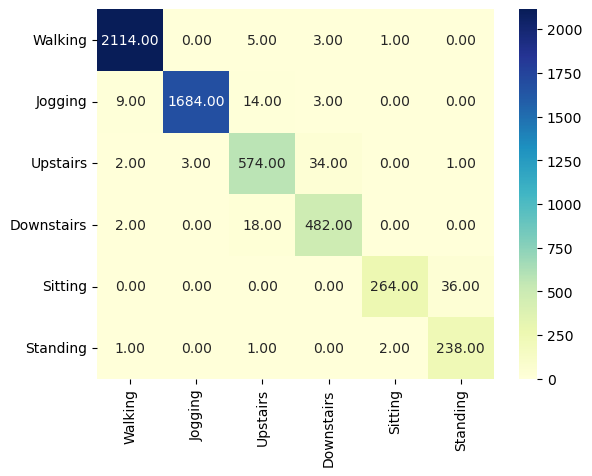

In [61]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [63]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(90))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 198, 64)           640       
                                                                 
 conv1d_8 (Conv1D)           (None, 196, 64)           12352     
                                                                 
 dropout_6 (Dropout)         (None, 196, 64)           0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 98, 64)           0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 90)                55800     
                                                                 
 dropout_7 (Dropout)         (None, 90)                0         
                                                      

In [64]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-01 17:29:40.544323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 17:29:40.753839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 17:29:41.713938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6956 - accuracy: 0.7559

2024-05-01 17:29:59.544388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 17:29:59.623395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 64ms/step - loss: 0.6956 - accuracy: 0.7559 - val_loss: 0.4178 - val_accuracy: 0.8515
Epoch 2/20
275/275 [==============================] - 13s 46ms/step - loss: 0.3918 - accuracy: 0.8519 - val_loss: 0.3623 - val_accuracy: 0.8616
Epoch 3/20
275/275 [==============================] - 12s 45ms/step - loss: 0.2845 - accuracy: 0.8991 - val_loss: 0.2579 - val_accuracy: 0.9046
Epoch 4/20
275/275 [==============================] - 13s 45ms/step - loss: 0.2039 - accuracy: 0.9292 - val_loss: 0.1569 - val_accuracy: 0.9465
Epoch 5/20
275/275 [==============================] - 12s 45ms/step - loss: 0.1593 - accuracy: 0.9455 - val_loss: 0.1761 - val_accuracy: 0.9392
Epoch 6/20
275/275 [==============================] - 12s 45ms/step - loss: 0.1382 - accuracy: 0.9526 - val_loss: 0.0982 - val_accuracy: 0.9652
Epoch 7/20
275/275 [==============================] - 12s 45ms/step - loss: 0.1282 - accuracy: 0.9562 - val_loss: 0.1203 - val_accuracy: 0.9570
Epo

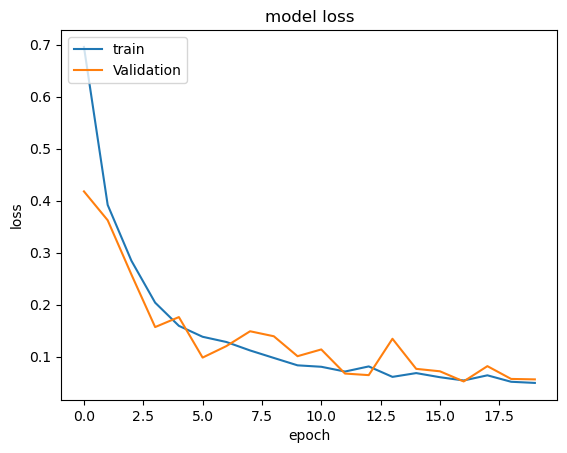

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

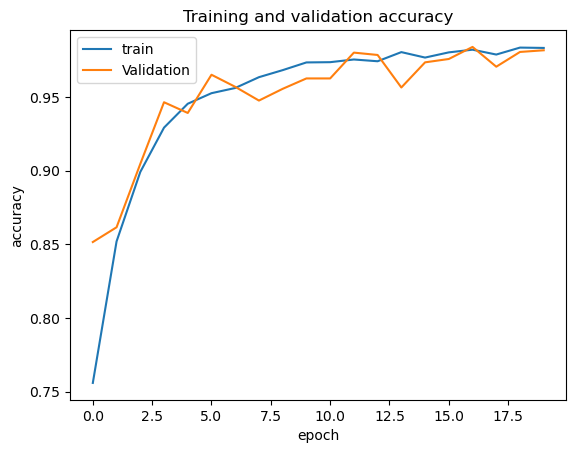

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

2024-05-01 17:34:23.126491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 17:34:23.192637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9827840207140056
0.9826989619377162
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2123
           1       1.00      0.98      0.99      1710
           2       0.92      0.97      0.95       614
           3       0.96      0.94      0.95       502
           4       0.99      0.99      0.99       300
           5       0.99      0.99      0.99       242

    accuracy                           0.98      5491
   macro avg       0.98      0.98      0.98      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

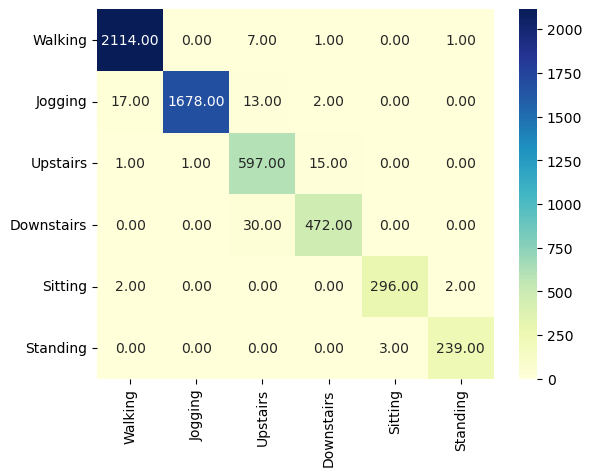

In [67]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [68]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(110))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 198, 64)           640       
                                                                 
 conv1d_10 (Conv1D)          (None, 196, 64)           12352     
                                                                 
 dropout_8 (Dropout)         (None, 196, 64)           0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 98, 64)           0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 110)               77000     
                                                                 
 dropout_9 (Dropout)         (None, 110)               0         
                                                      

In [69]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-01 17:35:36.382263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 17:35:36.582067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 17:35:37.386601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.7037 - accuracy: 0.7560

2024-05-01 17:35:55.188911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 17:35:55.268510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 64ms/step - loss: 0.7037 - accuracy: 0.7560 - val_loss: 0.5000 - val_accuracy: 0.8056
Epoch 2/20
275/275 [==============================] - 13s 46ms/step - loss: 0.3529 - accuracy: 0.8711 - val_loss: 0.3037 - val_accuracy: 0.8953
Epoch 3/20
275/275 [==============================] - 13s 45ms/step - loss: 0.2577 - accuracy: 0.9125 - val_loss: 0.2209 - val_accuracy: 0.9246
Epoch 4/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1893 - accuracy: 0.9369 - val_loss: 0.2042 - val_accuracy: 0.9217
Epoch 5/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1605 - accuracy: 0.9455 - val_loss: 0.1671 - val_accuracy: 0.9324
Epoch 6/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1290 - accuracy: 0.9553 - val_loss: 0.2566 - val_accuracy: 0.9076
Epoch 7/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1110 - accuracy: 0.9620 - val_loss: 0.0931 - val_accuracy: 0.9679
Epo

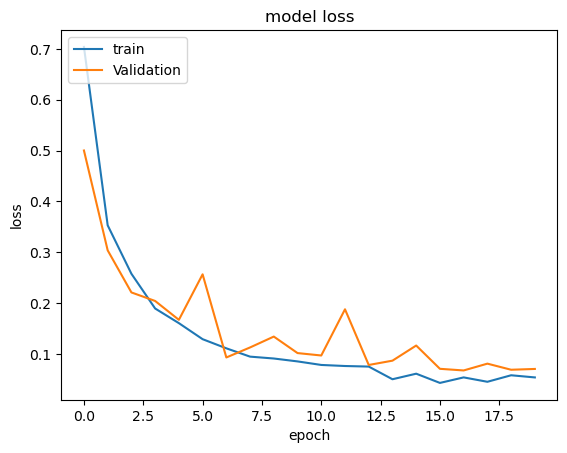

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

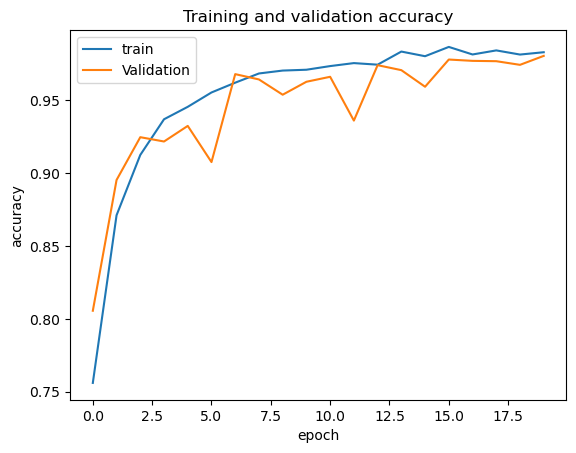

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

2024-05-01 17:40:41.666115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 17:40:41.738907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 19ms/step
f1_score =  0.9791516518619484
0.9790566381351302
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2123
           1       1.00      0.98      0.99      1710
           2       0.96      0.92      0.94       614
           3       0.90      0.98      0.93       502
           4       1.00      0.95      0.97       300
           5       0.95      1.00      0.98       242

    accuracy                           0.98      5491
   macro avg       0.97      0.97      0.97      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

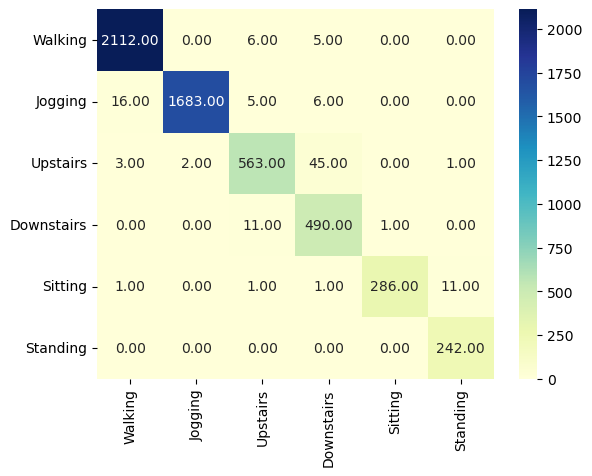

In [72]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [73]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(120))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 198, 64)           640       
                                                                 
 conv1d_12 (Conv1D)          (None, 196, 64)           12352     
                                                                 
 dropout_10 (Dropout)        (None, 196, 64)           0         
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 98, 64)           0         
 1D)                                                             
                                                                 
 lstm_5 (LSTM)               (None, 120)               88800     
                                                                 
 dropout_11 (Dropout)        (None, 120)               0         
                                                      

In [74]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-01 17:41:28.217294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 17:41:28.422632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 17:41:29.279495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6880 - accuracy: 0.7583

2024-05-01 17:41:47.424416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-01 17:41:47.504757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 23s 65ms/step - loss: 0.6880 - accuracy: 0.7583 - val_loss: 0.4145 - val_accuracy: 0.8235
Epoch 2/20
275/275 [==============================] - 13s 46ms/step - loss: 0.3658 - accuracy: 0.8621 - val_loss: 0.2983 - val_accuracy: 0.8791
Epoch 3/20
275/275 [==============================] - 13s 46ms/step - loss: 0.2685 - accuracy: 0.8981 - val_loss: 0.1865 - val_accuracy: 0.9226
Epoch 4/20
275/275 [==============================] - 13s 46ms/step - loss: 0.2075 - accuracy: 0.9241 - val_loss: 0.1851 - val_accuracy: 0.9319
Epoch 5/20
275/275 [==============================] - 13s 46ms/step - loss: 0.1754 - accuracy: 0.9390 - val_loss: 0.1605 - val_accuracy: 0.9419
Epoch 6/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1465 - accuracy: 0.9498 - val_loss: 0.1164 - val_accuracy: 0.9590
Epoch 7/20
275/275 [==============================] - 13s 47ms/step - loss: 0.1208 - accuracy: 0.9584 - val_loss: 0.1049 - val_accuracy: 0.9656
Epo

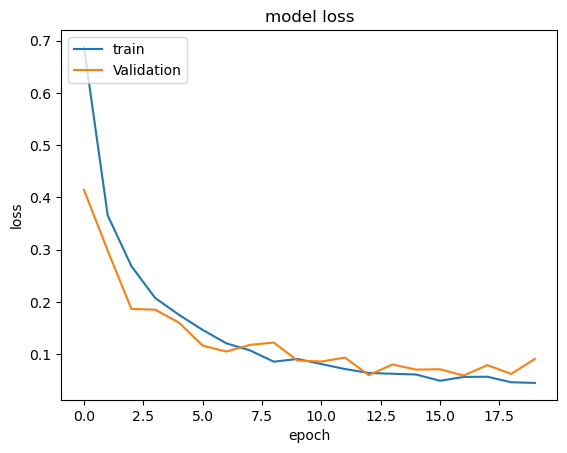

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

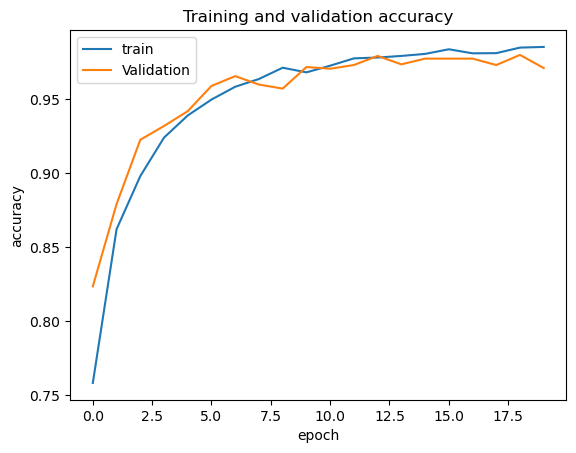

In [77]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

2024-05-02 01:44:27.809928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-02 01:44:27.973415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.9704218169720128
0.9697687124385358
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2123
           1       1.00      0.95      0.97      1710
           2       0.84      0.96      0.90       614
           3       0.94      0.97      0.95       502
           4       0.99      0.95      0.97       300
           5       0.95      0.99      0.97       242

    accuracy                           0.97      5491
   macro avg       0.95      0.97      0.96      5491
weighted avg       0.97      0.97      0.97      5491



<Axes: >

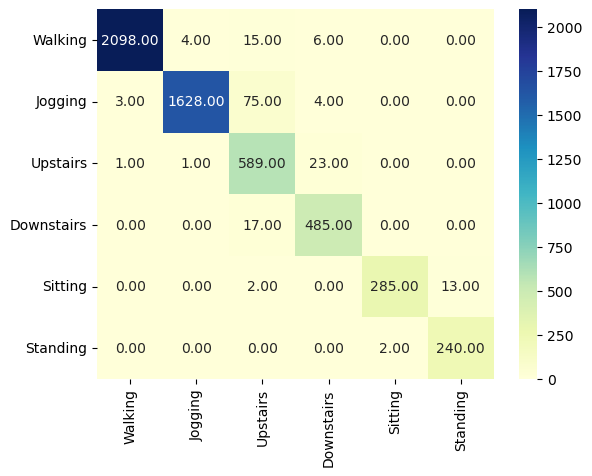

In [78]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [79]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

#model CNN - LSTM
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(130))

model.add(Dropout(0.5))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(n_outputs , activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 198, 64)           640       
                                                                 
 conv1d_14 (Conv1D)          (None, 196, 64)           12352     
                                                                 
 dropout_12 (Dropout)        (None, 196, 64)           0         
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 98, 64)           0         
 1D)                                                             
                                                                 
 lstm_6 (LSTM)               (None, 130)               101400    
                                                                 
 dropout_13 (Dropout)        (None, 130)               0         
                                                      

In [80]:
# validation_split = 0.1
batch_size = 64

train_epochs = 20
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/20


2024-05-02 01:45:46.433135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-02 01:45:46.641686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-02 01:45:47.629800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - ETA: 0s - loss: 0.6762 - accuracy: 0.7653

2024-05-02 01:46:06.805881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-02 01:46:06.895392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


275/275 [==============================] - 25s 70ms/step - loss: 0.6762 - accuracy: 0.7653 - val_loss: 0.4484 - val_accuracy: 0.8333
Epoch 2/20
275/275 [==============================] - 14s 52ms/step - loss: 0.3643 - accuracy: 0.8628 - val_loss: 0.8492 - val_accuracy: 0.7309
Epoch 3/20
275/275 [==============================] - 14s 50ms/step - loss: 0.2734 - accuracy: 0.8995 - val_loss: 0.5924 - val_accuracy: 0.8062
Epoch 4/20
275/275 [==============================] - 14s 49ms/step - loss: 0.2006 - accuracy: 0.9291 - val_loss: 0.2668 - val_accuracy: 0.8944
Epoch 5/20
275/275 [==============================] - 15s 53ms/step - loss: 0.1679 - accuracy: 0.9404 - val_loss: 0.2189 - val_accuracy: 0.9114
Epoch 6/20
275/275 [==============================] - 15s 54ms/step - loss: 0.1402 - accuracy: 0.9517 - val_loss: 0.1390 - val_accuracy: 0.9488
Epoch 7/20
275/275 [==============================] - 14s 51ms/step - loss: 0.1264 - accuracy: 0.9558 - val_loss: 0.1298 - val_accuracy: 0.9533
Epo

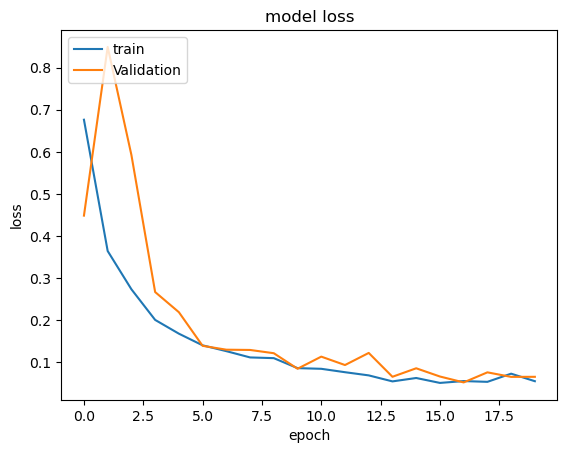

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

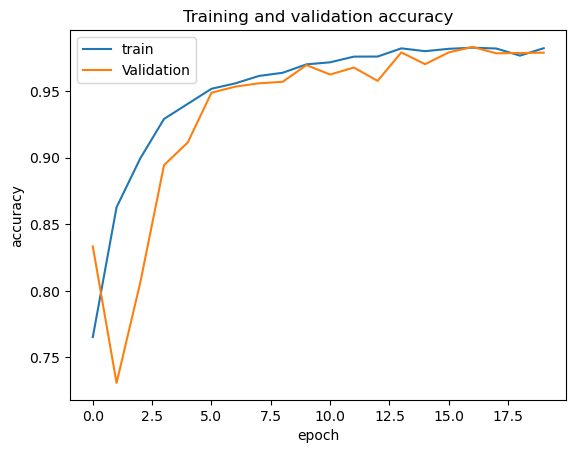

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

2024-05-02 01:51:31.009387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-05-02 01:51:31.080709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 4s 20ms/step
f1_score =  0.977917023103827
0.977781824804225
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2123
           1       1.00      0.99      0.99      1710
           2       0.91      0.96      0.93       614
           3       0.93      0.91      0.92       502
           4       0.99      0.96      0.98       300
           5       0.96      0.99      0.97       242

    accuracy                           0.98      5491
   macro avg       0.96      0.97      0.96      5491
weighted avg       0.98      0.98      0.98      5491



<Axes: >

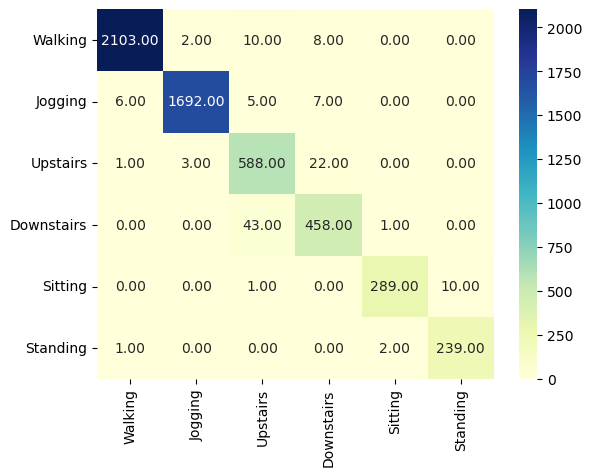

In [83]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')